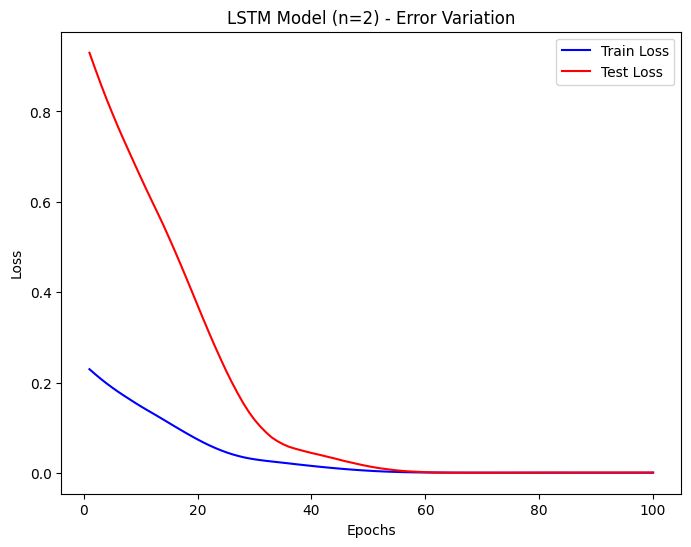

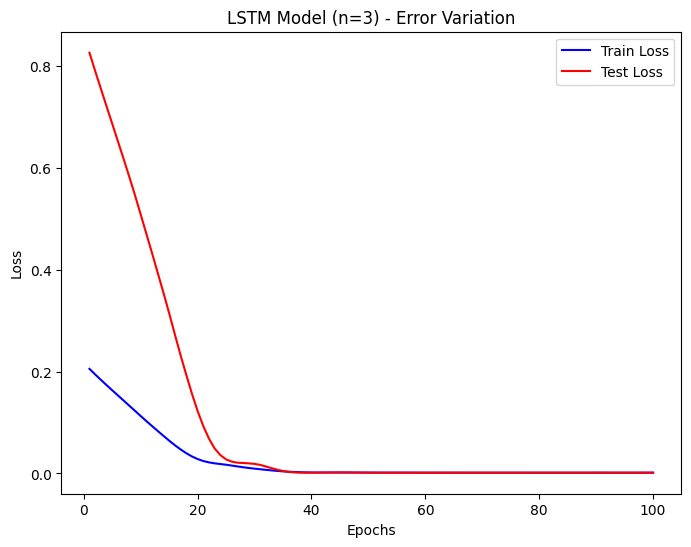

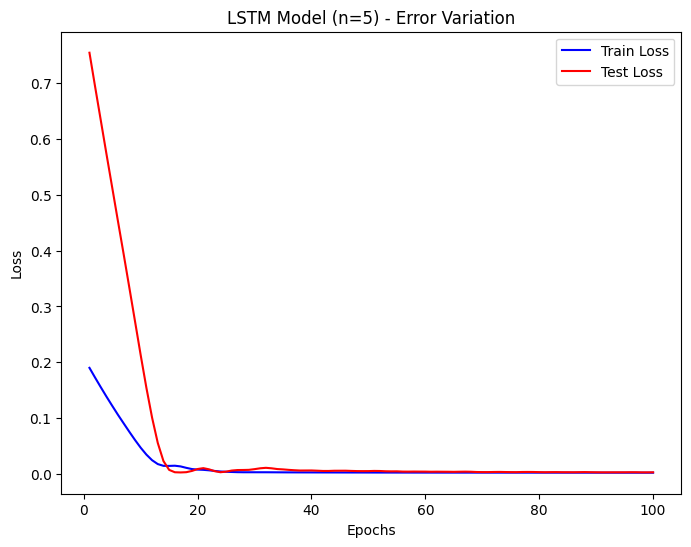

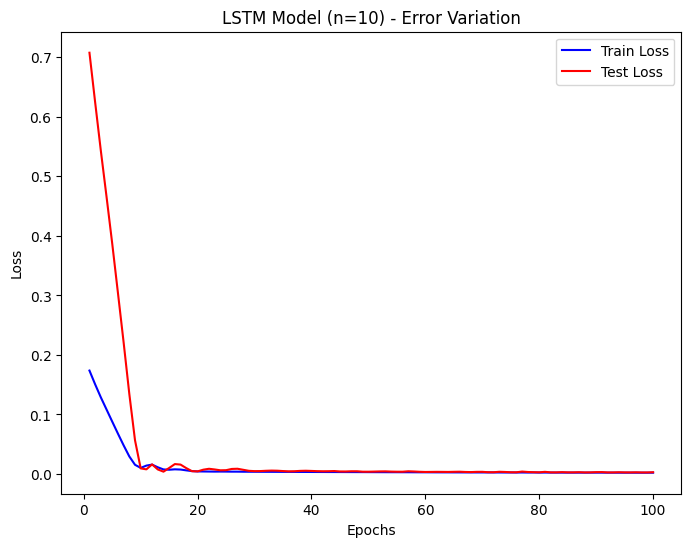

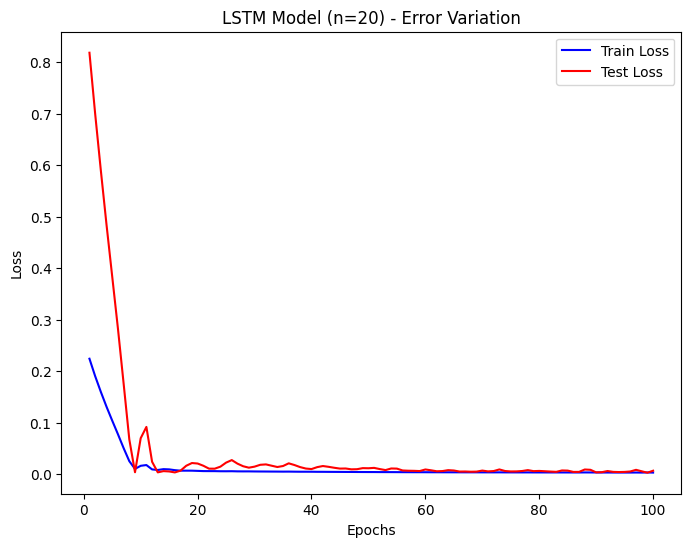

In [6]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv("/content/drive/MyDrive/DSFM/kospi200_futures_data.csv")
data = data['Adj Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

# Define a function to create sequences for LSTM
def create_sequences(data, n):
    X, y = [], []
    for i in range(n, len(data)):
        X.append(data[i-n:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Create sequences
n_values = [2, 3, 5, 10, 20]

for n in n_values:
    X_train, y_train = create_sequences(train_data, n)
    X_test, y_test = create_sequences(test_data, n)

    # Build and train the LSTM model
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.LSTM(50, activation='relu', input_shape=(n, 1)))  # Corrected line
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store loss values during training
    train_losses = []
    test_losses = []

    # Train the model and record loss values
    for epoch in range(100):  # You can adjust the number of epochs
        model.fit(X_train, y_train, epochs=1, batch_size=32, verbose=0)
        train_loss = model.evaluate(X_train, y_train, verbose=0)
        test_loss = model.evaluate(X_test, y_test, verbose=0)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

    # Plot the loss values over training epochs
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, 101), train_losses, label='Train Loss', color='blue')
    plt.plot(range(1, 101), test_losses, label='Test Loss', color='red')
    plt.title(f'LSTM Model (n={n}) - Error Variation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
